1 32 0.8287841191066998
1 64 0.8399503722084367
1 128 0.8349875930521092
1 256 0.8523573200992556
2 32 0.8225806451612904
2 64 0.8436724565756824
2 128 0.8511166253101737
2 256 0.8411910669975186
4 32 0.8573200992555832
4 64 0.8498759305210918
4 128 0.8411910669975186
4 256 0.8560794044665012
8 32 0.8387096774193549
8 64 0.8325062034739454
8 128 0.8436724565756824
8 256 0.8511166253101737


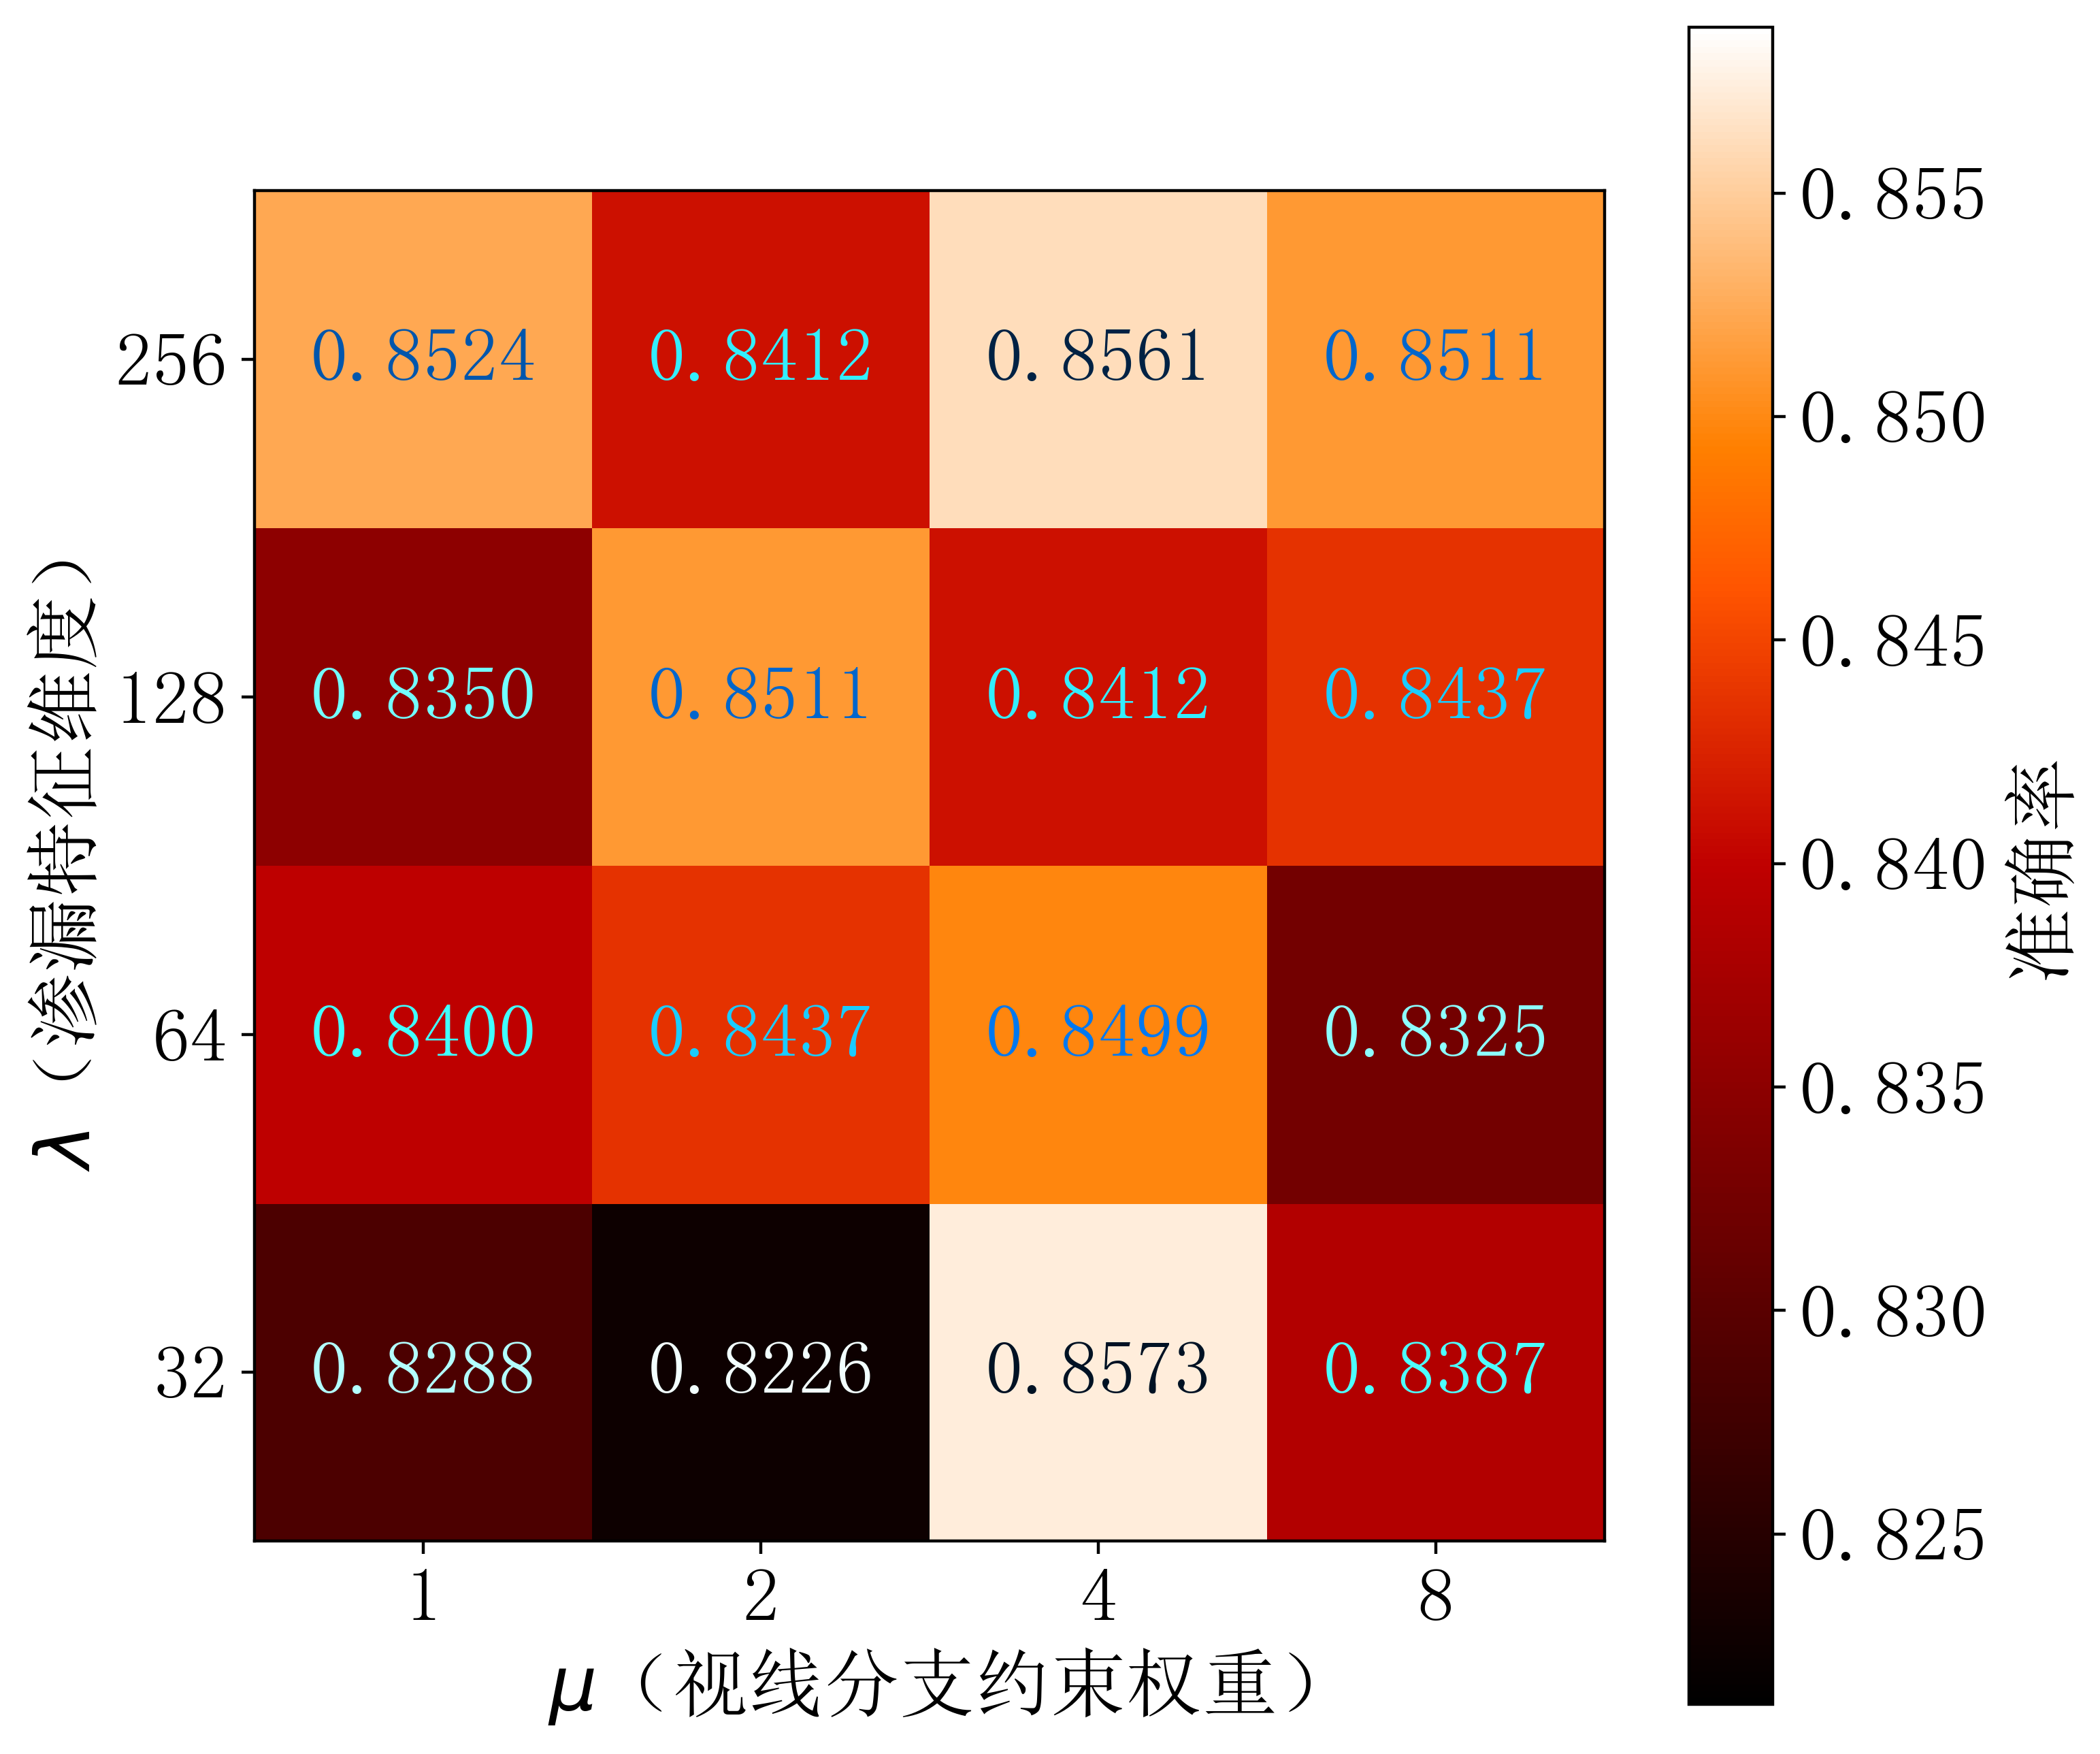

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import json

# plt.rcParams['font.family'] = 'SimSun'
plt.rcParams.update({
    'font.size': 20,
})

# Example parameter values
param1_values = np.linspace(0, 1.0, num=4)
param2_values = np.linspace(0, 1.0, num=4)
custom_y_ticks = [32, 64, 128, 256]
custom_x_ticks = [1, 2, 4, 8]

grid_unit_1_len = param1_values[1] - param1_values[0]
grid_unit_2_len = param2_values[1] - param2_values[0]

# # Example results (replace with your actual results)
# results = np.random.rand(len(param1_values), len(param2_values))

results = np.zeros((len(param1_values), len(param2_values)))
for i in range(len(custom_x_ticks)):
    for j in range(len(custom_y_ticks)):
        file_name = 'Results/WDF_GridSearch/WDF_W' + str(custom_x_ticks[i]) + '_D' + str(custom_y_ticks[j]) + '_result.json'
        with open(file_name, 'r') as f:
            temp_result = json.load(f)
        # temp_result = np.mean(temp_result['test_result']['vid_acc'][-3:])
        temp_result = np.max(temp_result['test_result']['vid_acc'])
        # temp_result = temp_result['test_result']['vid_acc'][-1]
        results[j][i] = temp_result
        print(custom_x_ticks[i], custom_y_ticks[j], temp_result)

# Define a custom colormap from blue to red
cmap = plt.cm.get_cmap('gist_heat')
result_range = results.max() - results.min()
norm = Normalize(vmin=results.min()-result_range/25, vmax=results.max()+result_range/25)

# Set the figure size to make it square-shaped
plt.figure(figsize=(8, 8), dpi=400)  # Adjust the size as needed

# Create a heatmap-like plot
heatmap = plt.imshow(
    results,
    cmap=cmap,
    norm=norm,
    origin='lower',
    extent=[
        min(param2_values)-grid_unit_2_len/2,
        max(param2_values)+grid_unit_2_len/2,
        min(param1_values)-grid_unit_1_len/2,
        max(param1_values)+grid_unit_1_len/2
    ]
)

plt.colorbar(label='Accuracy')
plt.xlabel(r'$\mu$(Weight Of MSE Constraint)')
plt.ylabel(r'$\lambda$(Leaky Dimension)')

# plt.colorbar(label='准确率')
# plt.xlabel(r'$\mu$（视线分支约束权重）')
# plt.ylabel(r'$\lambda$（渗漏特征维度）')

# Add data labels above each grid cell with contrasting text color
for i in range(len(param1_values)):
    for j in range(len(param2_values)):
        cell_color = heatmap.cmap(heatmap.norm(results[i, j]))
        text_color = (1-cell_color[0], 1-cell_color[1], 1-cell_color[2])
        plt.text(param2_values[j], param1_values[i], f'{results[i, j]:.4f}', ha='center', va='center', color=text_color, fontsize=20)
        
# Set custom tick locations and labels on the x-axis
plt.xticks(param2_values, custom_x_ticks)
plt.yticks(param1_values, custom_y_ticks)

plt.savefig('Results/GridSearch.pdf', bbox_inches='tight')
plt.show()
